<a href="https://colab.research.google.com/github/farfaness/Machine_learning/blob/master/ModeleLineaire1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modèle linéaire

Considérons le cas classique d'une fonction affine :

$$y=ax+b$$

Ici, $a$ et $b$ sont des réels. Ces deux nombres définissent entièrement la courbe et permet donc d'obtenir une relation **affine** entre $x$ et $y$. En statistique, cette relation est à la base des modèles dit **linéaires**, où une variable réponse se définit comme une somme de variables explicatives où chacune de ces dernières sont multipliés par un coefficient.


## Modèle linéaire simple

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/438px-Linear_regression.svg.png)

Dans le modèle linéaire simple (une seule variable explicative), on suppose que la variable réponse suit le modèle suivant :

$$y_i=\beta_0 + \beta_1 x_i + \varepsilon_i$$

On remarque la ressemblance avec la fonction affine présentée ci-dessus. La différence réside dans l'existence du terme aléatoire (appelé bruit) $\varepsilon_i$. Afin de considérer le modèle, il est nécessaire de se placer sous les hypothèses suivantes

$$(\mathcal{H}) : \left\{\begin{matrix}
\mathbb{E}[\varepsilon_i]=0\\ 
\text{Cov}(\varepsilon_i, \varepsilon_j)=\delta_{ij} \sigma^2
\end{matrix}\right.$$
Les différents éléments qui interviennent sont :

- $\beta_0$ : l'ordonnée à l'origine (nommée *intercept*)
- $\beta_1$ : le coefficient directeur
- $x_i$ : l'observation $i$
- $y_i$ : le $i$-ème prix
- $\varepsilon_i$ : le bruit aléatoire liée à la $i$-ème observation

La solution peut se calculer facilement via les formules fermées suivantes :

$$\hat{\beta}_1=\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} \qquad \hat{\beta}_0 = \hat{y} - \hat{\beta}_1 \bar{x}$$

## Modèle linéaire multiple

Dans le cas multiple (pour $p$ variables explicatives), pour la $i$-ème observation, le modèle s'écrit :

$$y_i= \beta_0 + \sum_{j=1}^p \beta_j x_{ij} + \varepsilon_i$$

Ainsi, une observation $x_i$ n'est plus une valeur, mais un **vecteur** $(x_{i1}, \dots, x_{ip})$. Il est plus commode de regrouper ces prix $y_i$ et ces vecteurs d'observations $x_i$ dans des matrices :

$$Y=X \beta + \varepsilon$$

Sous les hypothèses équivalentes du modèle simple en plus grand dimension

$$(\mathcal{H}) : \left\{\begin{matrix}
\text{rank}(X)=p\\ 
\mathbb{E}[\varepsilon]=0 \text{ et }\text{Var}(\varepsilon)=\sigma^2 I_p
\end{matrix}\right.$$

Les différents éléments qui interviennent sont :

- $\beta$ : le vecteur directeur
- $X$ : la matrice des observations
- $Y$ : le vecteur de prix
- $\varepsilon$ : le vecteur de bruit

Avec $X=( \mathbf{1}, X_1, \dots, X_n)$, $Y=(y_1, \dots, y_n)^\top$ et $\varepsilon=(\varepsilon_1, \dots, \varepsilon_n)^\top$. La solution des MCO (Moindres Carrés Ordinaires) est alors :

$$\hat{\beta}= (X^\top X)^{-1} X^\top Y$$

Vous pouvez d'ailleurs faire la démonstration de votre coté ! Pour plus d'information mathématiques, je vous conseil le portail de wikipédia qui est très bien fait : [lien ici](https://fr.wikipedia.org/wiki/Portail:Probabilit%C3%A9s_et_statistiques)

# Implémenter une régression linéaire 


In [0]:
#importer vos librairies 
import warnings
warnings.simplefilter("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sl

In [0]:
#Charger les données 
#price_availability.csv
#listings_final.csv
#attention l'individu 589 n'a pas de prix !!
data_price = pd.read_csv('/content/drive/My Drive/price_availability.csv', sep=';')

In [0]:
data_price.head()

,listing_id,day,created,available,local_currency,local_price,min_nights
0,9810829,2018-12-08,2018-09-27 06:14:10.000+0000,True,EUR,160,1
1,9810829,2018-12-08,2018-09-26 19:34:02.000+0000,True,EUR,160,1
2,20897010,2018-12-09,2018-09-27 10:38:57.000+0000,True,EUR,172,2
3,20897010,2018-12-09,2018-09-27 06:10:27.000+0000,True,EUR,172,2
4,20897010,2018-12-09,2018-09-26 19:30:25.000+0000,True,EUR,172,2


In [0]:
data_price.describe()

,listing_id,local_price,min_nights
count,4.748696e+06,4.748696e+06,4.748696e+06
mean,1.523313e+07,1.944215e+02,7.877554e+00
std,9.190721e+06,2.289745e+02,2.407054e+01
min,5.396000e+03,9.000000e+00,1.000000e+00
25%,6.351188e+06,7.900000e+01,2.000000e+00
50%,1.641294e+07,1.440000e+02,3.000000e+00
75%,2.353692e+07,2.400000e+02,4.000000e+00
max,2.885198e+07,1.000300e+04,3.650000e+02


In [0]:
data_final = pd.read_csv('/content/drive/My Drive/listings_final.csv', sep=';')

In [0]:
data_final.head()

,Unnamed: 0,listing_id,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1,1,1,2.0,False,True,True,False,False,1.00,1.00
1,1,661961,studio PARIS PLACE EDITH PIAF 75020,entire_home,Paris,NaN,48.867284,2.403255,2,1,1,1.0,False,False,True,True,False,0.88,0.69
2,2,1261705,chambre privée à louer @ paris oberkampf,private_room,Paris,NaN,48.867894,2.375897,1,1,1,1.0,False,False,True,True,False,1.00,1.00
3,3,1318834,Appartement au coeur du Marais,entire_home,Paris,République,48.870370,2.358510,3,2,2,1.0,False,False,True,False,False,0.82,0.48
4,4,1677091,Lovely & Quiet flat,entire_home,Paris,Buttes-Chaumont - Belleville,48.874149,2.373700,2,1,1,1.0,False,False,True,True,False,0.95,0.90


In [0]:
data_final.describe(include = 'all')

,Unnamed: 0,listing_id,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
count,1000.000000,1.000000e+03,1000,1000,1000,935,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000
unique,NaN,NaN,999,3,3,42,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2,2,1,NaN,NaN
top,NaN,NaN,studette,entire_home,Paris,Le Marais,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,True,False,NaN,NaN
freq,NaN,NaN,2,858,995,87,NaN,NaN,NaN,NaN,NaN,NaN,1000,941,979,571,1000,NaN,NaN
mean,499.500000,1.543673e+07,NaN,NaN,NaN,NaN,48.864251,2.345147,3.668000,2.056000,1.326000,1.230500,NaN,NaN,NaN,NaN,NaN,0.942909,0.871658
std,288.819436,9.302042e+06,NaN,NaN,NaN,NaN,0.009819,0.031869,2.190108,1.501039,0.998359,0.524304,NaN,NaN,NaN,NaN,NaN,0.073744,0.162963
min,0.000000,5.609300e+04,NaN,NaN,NaN,NaN,48.844372,2.268992,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.600000,0.330000
25%,249.750000,6.346503e+06,NaN,NaN,NaN,NaN,48.856930,2.326551,2.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.900000,0.750000
50%,499.500000,1.727862e+07,NaN,NaN,NaN,NaN,48.864405,2.349139,3.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
75%,749.250000,2.378409e+07,NaN,NaN,NaN,NaN,48.871875,2.366960,4.000000,3.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000


In [0]:
new_dataset = pd.merge(data_price, data_final, on='listing_id', how='right')
new_dataset.head()

,listing_id,day,created,available,local_currency,local_price,min_nights,Unnamed: 0,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,17757345,2018-10-14,2018-09-27 10:40:07.000+0000,False,EUR,40.0,1.0,540,En plein cœur de Belleville,private_room,Paris,République,48.870315,2.374332,2,1,1,1.0,False,False,True,False,False,1.0,1.0
1,17757345,2018-10-14,2018-09-27 06:05:54.000+0000,False,EUR,40.0,1.0,540,En plein cœur de Belleville,private_room,Paris,République,48.870315,2.374332,2,1,1,1.0,False,False,True,False,False,1.0,1.0
2,17757345,2018-10-14,2018-09-26 19:31:41.000+0000,False,EUR,40.0,1.0,540,En plein cœur de Belleville,private_room,Paris,République,48.870315,2.374332,2,1,1,1.0,False,False,True,False,False,1.0,1.0
3,17757345,2018-10-05,2018-09-27 10:40:07.000+0000,False,EUR,40.0,1.0,540,En plein cœur de Belleville,private_room,Paris,République,48.870315,2.374332,2,1,1,1.0,False,False,True,False,False,1.0,1.0
4,17757345,2018-10-05,2018-09-27 06:05:54.000+0000,False,EUR,40.0,1.0,540,En plein cœur de Belleville,private_room,Paris,République,48.870315,2.374332,2,1,1,1.0,False,False,True,False,False,1.0,1.0


In [0]:
new_dataset.describe(include = 'all')

,listing_id,day,created,available,local_currency,local_price,min_nights,Unnamed: 0,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
count,4.026170e+05,402616,402616,402616,402616,402616.000000,402616.000000,402617.000000,402617,402617,402617,377261,402617.000000,402617.000000,402617.000000,402617.000000,402617.000000,402617.000000,402617,402617,402617,402617,402617,402617.000000,402617.000000
unique,NaN,133,1539,2,1,NaN,NaN,NaN,999,3,3,42,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2,2,1,NaN,NaN
top,NaN,2018-10-02,2018-09-26 15:10:42.000+0000,False,EUR,NaN,NaN,NaN,studette,entire_home,Paris,Le Marais,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,True,False,NaN,NaN
freq,NaN,3054,2654,268502,402616,NaN,NaN,NaN,904,345547,400709,35532,NaN,NaN,NaN,NaN,NaN,NaN,402617,379124,393496,231139,402617,NaN,NaN
mean,1.531676e+07,NaN,NaN,NaN,NaN,194.766075,7.402758,500.570237,NaN,NaN,NaN,NaN,48.864166,2.344911,3.738290,2.104496,1.350817,1.246315,NaN,NaN,NaN,NaN,NaN,0.943016,0.871612
std,9.280959e+06,NaN,NaN,NaN,NaN,191.812037,21.414346,285.649974,NaN,NaN,NaN,NaN,0.009784,0.031563,2.236427,1.568041,1.013480,0.541057,NaN,NaN,NaN,NaN,NaN,0.073547,0.163177
min,5.609300e+04,NaN,NaN,NaN,NaN,9.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,48.844372,2.268992,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.600000,0.330000
25%,6.278981e+06,NaN,NaN,NaN,NaN,78.000000,2.000000,255.000000,NaN,NaN,NaN,NaN,48.856910,2.326578,2.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.900000,0.750000
50%,1.703526e+07,NaN,NaN,NaN,NaN,145.000000,3.000000,498.000000,NaN,NaN,NaN,NaN,48.864207,2.348892,3.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
75%,2.364286e+07,NaN,NaN,NaN,NaN,240.000000,4.000000,748.000000,NaN,NaN,NaN,NaN,48.871668,2.366514,4.000000,3.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000


In [0]:
data_price.shape, data_final.shape, new_dataset.shape

((4748696, 7), (1000, 19), (402617, 25))

In [0]:
new_dataset['listing_id'].value_counts()

23566040    526
10744247    525
28709644    525
26798869    524
12976143    524
7354358     524
9072020     524
27030906    524
25790947    523
1711246     523
23385994    523
17973038    523
17432320    523
24239065    522
15162820    522
9723864     522
2511095     522
12725313    522
1070274     522
24262826    522
24743821    522
19395544    521
23799139    521
13420365    521
2804962     521
24113796    521
4882717     521
15495194    521
10010861    521
728396      521
           ... 
19855401    372
1261705     372
2576959     372
12241478    372
1008724     371
23636918    370
26527387    369
15881321    266
28792796    266
23871255    266
22199515    264
27259692    258
22022302    253
16644286    252
27447713    252
10401897    251
10402505    251
26612229    251
16370598    250
1677091     133
17956827    133
25702020    133
25766867    133
28030890    133
23179840    133
661961      133
26556587    133
24248060    132
14386985    131
19403332      1
Name: listing_id, Length

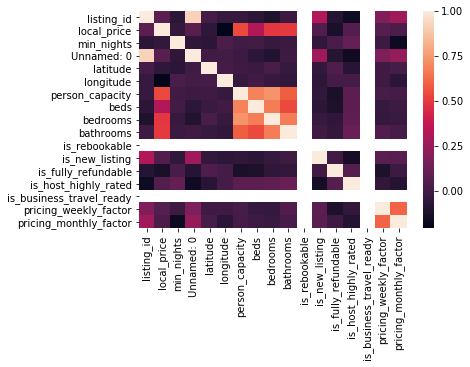

In [0]:
sns.heatmap(new_dataset.corr())

## Données d'entrée

L'objectif ici est de charger les données pour créer les matrices $X$ et $Y$ du modèle linéaire. **Attention**, il n'est pas nécessaire de rajouter le vecteur colonne $\mathbf{1}$ en première colonne, car *scikit-learn* le fait automatiquement !

In [0]:
#Définition de 2 variables de travail
#X := les features à utiliser 
#Y := la target (prix)
X = new_dataset[['person_capacity', 'bedrooms', 'bathrooms', 'listing_id']]

In [0]:
#Construction de l'ensemble de donnée prix 

# On va itérer le dataset d'ID : clé de jointure, que les ID des apparts pour lesquels on a le prix
# et récupérer les prix des ID dans le dataset de prix 
# il y a plusieurs prix pour un appartement, on va faire des moyennes

y = new_dataset.groupby(['listing_id'])['local_price'].mean()
len(Y), Y.head(35)
print(Y.tolist())

X = X.groupby(['listing_id']).mean()
print(X.shape, Y.shape)

[170.0, 49.95275590551181, 107.37402597402597, 169.0, 75.8762088974855, 284.35356200527707, 36.58961038961039, 300.0, 101.37984496124031, 67.20833333333333, 60.740932642487046, 38.0, 92.0, 66.21204188481676, 79.68041237113403, 90.09819121447029, 170.0, 115.75447570332481, 283.76115485564304, 144.74424552429667, 347.67015706806285, 115.0, 105.0, 154.65384615384616, 380.0, 44.16569200779727, 233.6917098445596, 146.0, 147.96623376623376, 105.0, 163.47286821705427, 190.0, 180.95287958115182, 128.86304909560724, 44.473684210526315, 163.28571428571428, 94.0, 94.97619047619048, 218.96373056994818, 234.89460154241644, 300.7864077669903, 62.0, 59.023498694516974, 80.24479166666667, 53.0, 92.0, 210.87855297157623, 278.90625, 165.0, 179.67315175097275, 105.71849865951742, 43.84615384615385, 105.15873015873017, 165.0, 172.67822736030828, 109.0, 42.86340206185567, 220.0, 136.57559681697612, 240.0, 990.0, 139.2587601078167, 196.03846153846155, 226.0, 69.0, 357.44125326370755, 62.39080459770115, 145.

En *Machine Learning*, on a l'habitude de couper l'ensemble de données en deux sous-ensembles :

- Un ensemble d'entraînement (*train set*), sur lequel le modèle va être calibré.
- Un ensemble de test (*test set*), qui ne sera pas utilisé pendant le calibrage mais permettra de vérifier l'aptitude du modèle à généraliser sur de nouvelles observations inconnues.

En général, on découpe l'ensemble de données (*split*) en prenant $\alpha \%$ de l'ensemble pour entraînement et $1-\alpha \%$ comme test. Dans la plus part des cas, on considère que $\alpha=10,20 ou 30\%$.

In [0]:
# Utilisation de la méthode split de sklearn en splitant avec un alpha=30 et un random state=42  (test sur 30%, entraine sur 70%)
# Affichage de la shape de nos données 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(700, 3) (700,) (300, 3) (300,)


## Entraînement

Pour information, *scikit-learn* utilise le solveur OLS (Ordinary Least Squares) de *numpy*.

In [0]:
# Création de l'objet de régression et entrainement sur notre ensemble d'entraînement

from sklearn.linear_model import LinearRegression
reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False).fit(X_train, y_train)

On affiche le vecteur des coefficients pour interpréter rapidement le modèle.

In [0]:
# Affichage des coefficients
print(reg.coef_)
print(reg.intercept_)

[34.32015716 10.66936837 91.17564414]
-60.87580551126689


## Validation du modèle

### Le coefficient de détermination $R^2$

Par la suite, nous ferons l'hypothèse de gaussianité sur les bruits. Dans l'idée, nous aimerions obtenir une valeur numérique qui nous indique à quel point la régression linéaire a un sens sur nos données. Pour cela, introduisons les notations suivantes :

- $SCT=\|Y-\hat{y} \mathbf{1}\|^2$ est la somme des carrés totaux
- $SCE=\|\hat{Y}-\hat{y} \mathbf{1}\|^2$ est la somme des carrés expliqués
- $SCR=\|\hat{\varepsilon}\|^2$ est la somme des carrés résiduels

L'idée est de décomposer la somme des carrés totaux comme la somme des carrés que le modèle explique, en plus de la somme des carrés qui sont liés aux résidus (et donc que le modèle ne peut pas expliquer). On voit donc ici l'intérêt de calculer un coefficient à partir du $SCE$. Puisque l'on a la relation suivante :

$$SCT=SCE+SCR \text{ alors } 1=\frac{SCE}{SCT}+\frac{SCR}{SCT}$$

Plus les résidus sont petits (et donc la régression est "bonne"), plus $SCR$ devient petit et donc $SCE$ devient grand. Le schéma inverse s'opère de la même façon. Dans le meilleur des cas, on obtient $SCR=0$ et donc $SCE=SCT$ d'où le premier membre vaut $1$. Dans le cas contraite, $SCE=0$ et automatiquement, le premier membre est nul. C'est ainsi que l'on définit le coefficient de détermination $R^2$ comme 
$$R^2=\frac{SCE}{SCT}=1-\frac{SCR}{SCT}$$
Ainsi, $R^2 \in [0,1]$. Plus $R^2$ est proche de $1$, plus la régression linéaire a du sens. Au contraire, si $R^2$ est proche de $0$, le modèle linéaire possède un faible pouvoir explicatif.

In [0]:
# pour faire une prediction sur X
data_y_pred = reg.predict(X)
print(len(data_y_pred))

1000


In [0]:
# pour afficher l'erreur des moindres carrées sur l'ensemble d'entrainement ainsi que le R2
MSE = sl.metrics.mean_squared_error(y, data_y_pred, sample_weight=None)
print(MSE)

#R2
print(reg.score(X_train, y_train))

## Analyse de l'homoscédasticité

L'analyse de l'homoscédasticité est primordiale : c'est en particulier elle qui nous permet de vérifier, à partir des résidus, si les bruits vérifient bien l'hypothèse $(\mathcal{H})$. On calcule donc les **résidus studentisés**.

$$t_i^*=\frac{\hat{\varepsilon}_i}{\hat{\sigma}_{(i)} \sqrt{1-h_{ii}}}$$
Avec $h_{ii}=\{X(X^\top X)^{-1} X^\top\}_{ii}=H_{ii}$ la matrice de projection sur l'hyperplan des variables. Plus précisément, $H$ est la matrice qui projette $Y$ sur l'espace engendré par les variables, soit $\hat{Y}=HY$. De même, on considère $\hat{\sigma}_{(i)}$ l'estimateur de la variance du bruit en supprimant l'observation $i$ (par une méthode de validation croisée Leave-One-Out que nous ne détaillerons pas ici).

Dans ce cas, on peut montrer que les résidus studentisés suivent une loi de Student à $n-p-1$ degrés de liberté.

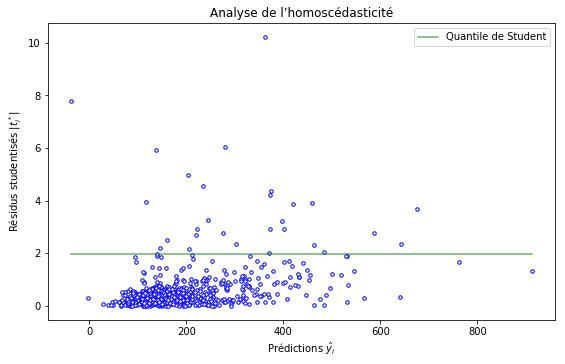

In [0]:
import scipy
Y_pred = regr.predict(X_train)
n = X_train.shape[0]
p = 4
residuals = np.abs(y_train - Y_pred)
H = np.matmul(X_train, np.linalg.solve(np.dot(X_train.T, X_train), X_train.T))
std_hat = np.dot(residuals, residuals) / (n - p)
standart_residuals = np.asarray([residuals[i] / np.sqrt(std_hat * (1 - H[i, i])) for i in range(len(residuals))])
student_residuals = np.asarray([ standart_residuals[i] * np.sqrt((n - p - 1) / (n - p - standart_residuals[i]**2)) for i in range(n) ])
cook = np.asarray([ H[i, i] * student_residuals[i] / (X_train.shape[1] * (1 - H[i, i])) for i in range(n) ])

plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.scatter(Y_pred, student_residuals, s=12, c="white", edgecolors="blue")
plt.plot([min(Y_pred), max(Y_pred)], [ scipy.stats.t.ppf(q=0.975, df=n-p-1), scipy.stats.t.ppf(q=0.975, df=n-p-1)], color="green", alpha=0.6, label="Quantile de Student")
plt.title("Analyse de l’homoscédasticité")
plt.xlabel("Prédictions $\hat{y}_i$")
plt.ylabel("Résidus studentisés $|t_i^*|$")
plt.legend()